In [1]:
from keras.layers import Embedding

embedding_layer = Ｅmbedding(1000,64)

C:\Users\yueki\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# List 6-6
from keras.datasets import imdb
from keras import preprocessing

max_features =1000

max_len =20

(x_train,y_train) , (x_test,y_test) = \
    imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=max_len)
x_test  = preprocessing.sequence.pad_sequences(x_test ,maxlen=max_len) 

In [3]:
# list 6-7

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(1000,8,input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             8000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train,y_train,
                   epochs=10,
                    batch_size=32,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 111us/step - loss: 0.6772 - acc: 0.6007 - val_loss: 0.6448 - val_acc: 0.6704
Epoch 2/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.5830 - acc: 0.7188 - val_loss: 0.5629 - val_acc: 0.7046
Epoch 3/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.5152 - acc: 0.7464 - val_loss: 0.5362 - val_acc: 0.7208
Epoch 4/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.4879 - acc: 0.7606 - val_loss: 0.5299 - val_acc: 0.7292
Epoch 5/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.4731 - acc: 0.7693 - val_loss: 0.5290 - val_acc: 0.7334
Epoch 6/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.4633 - acc: 0.7773 - val_loss: 0.5317 - val_acc: 0.7344
Epoch 7/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.4548 - acc: 0.7819 - val_loss: 0.5333 - val_acc

In [5]:
def compare_TV(history):
    import matplotlib.pyplot as plt

    # Setting Parameters
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # 1) Accracy Plt
    plt.plot(epochs, acc, 'bo' ,label = 'training acc')
    plt.plot(epochs, val_acc, 'b' , label= 'validation acc')
    plt.title('Training and Validation acc')
    plt.legend()

    plt.figure()

    # 2) Loss Plt
    plt.plot(epochs, loss, 'bo' ,label = 'training loss')
    plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()


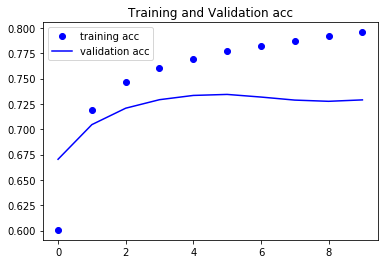

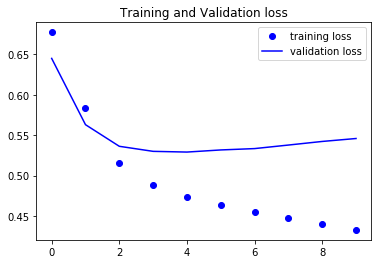

In [6]:
compare_TV(history)

In [7]:
# 6-8
# Imdbを元データから取り込む
import os

imdb_dir = '.\\data\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

print(os.path.exists(imdb_dir))
print(os.getcwd())
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf-8') # Windows環境ではutf-8を指定すること
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

True
C:\Users\yueki\Study\Keras\CH06


In [8]:
# 6-9

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer( num_words=max_words )
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:', labels.shape ) 
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]



Found 72633 unique tokens.
Shape of data tensor: (17243, 100)
Shape of label tensor: (17243,)


In [9]:
#6-10
glove_dir = '.\\data\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding='utf-8' )
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
#print('Found %s word vectors.' % len(embeddings_index))

In [10]:
# 6-11
embedding_dim = 100

embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#6-12
from keras.models import Sequential
from keras.layers import Embedding, Flatten,Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 6-13
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [12]:
# 6-14
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [13]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.9447 - acc: 0.5500 - val_loss: 1.1285 - val_acc: 0.7243
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4946 - acc: 0.7450 - val_loss: 0.7484 - val_acc: 0.7243
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2969 - acc: 0.8800 - val_loss: 0.6038 - val_acc: 0.7027
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2839 - acc: 0.8850 - val_loss: 0.6934 - val_acc: 0.5632
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2536 - acc: 0.9250 - val_loss: 0.6162 - val_acc: 0.7133
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0913 - acc: 0.9900 - val_loss: 0.6354 - val_acc: 0.6950
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0677 - acc: 0.9950 - val_loss: 0.8887 - val_acc: 0.7259
Epoch 8/10
200/200 [========

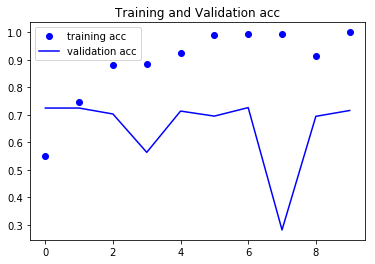

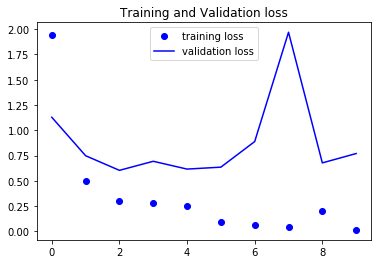

In [14]:
# 6-15
from _compareTV import compare_TV 
compare_TV(history)

In [15]:
# 6-16

from keras.models import Sequential
from keras.layers import Embedding, Flatten,Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [17]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6679 - acc: 0.6750 - val_loss: 0.6158 - val_acc: 0.7243
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4129 - acc: 0.8650 - val_loss: 0.5901 - val_acc: 0.7242
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2155 - acc: 0.9900 - val_loss: 0.5924 - val_acc: 0.7236
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0946 - acc: 1.0000 - val_loss: 0.5991 - val_acc: 0.7158
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0424 - acc: 1.0000 - val_loss: 0.6029 - val_acc: 0.7242
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0222 - acc: 1.0000 - val_loss: 0.6091 - val_acc: 0.7219
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.6187 - val_acc: 0.7228
Epoch 8/10
200/200 [========

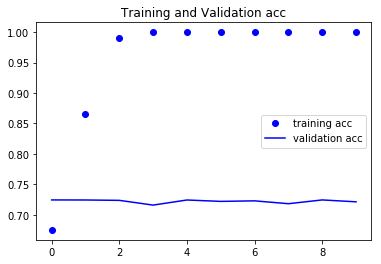

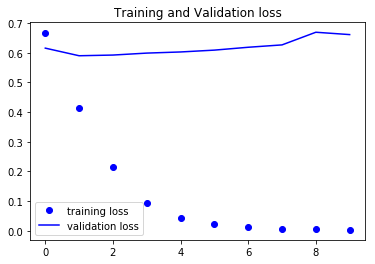

In [18]:
from _compareTV import compare_TV 
compare_TV(history)